In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://mirror.its.dal.ca/apache/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

The system cannot find the path specified.
'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'spark-2.4.0-bin-hadoop2.7.tgz'


In [2]:
import pyspark

In [4]:
print(dir(pyspark))

['Accumulator', 'AccumulatorParam', 'BarrierTaskContext', 'BarrierTaskInfo', 'BasicProfiler', 'Broadcast', 'HiveContext', 'InheritableThread', 'MarshalSerializer', 'PickleSerializer', 'Profiler', 'RDD', 'RDDBarrier', 'Row', 'SQLContext', 'SparkConf', 'SparkContext', 'SparkFiles', 'SparkJobInfo', 'SparkStageInfo', 'StatusTracker', 'StorageLevel', 'TaskContext', '_NoValue', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_globals', 'accumulators', 'broadcast', 'cloudpickle', 'conf', 'context', 'copy_func', 'files', 'find_spark_home', 'java_gateway', 'join', 'keyword_only', 'profiler', 'rdd', 'rddsampler', 'resource', 'resultiterable', 'serializers', 'shuffle', 'since', 'sql', 'statcounter', 'status', 'storagelevel', 'taskcontext', 'traceback_utils', 'types', 'util', 'version', 'wraps']


In [6]:
import pyspark.sql 

In [7]:
print(dir(pyspark.sql))

['Catalog', 'Column', 'DataFrame', 'DataFrameNaFunctions', 'DataFrameReader', 'DataFrameStatFunctions', 'DataFrameWriter', 'GroupedData', 'HiveContext', 'PandasCogroupedOps', 'Row', 'SQLContext', 'SparkSession', 'UDFRegistration', 'Window', 'WindowSpec', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'catalog', 'column', 'conf', 'context', 'dataframe', 'group', 'pandas', 'readwriter', 'session', 'streaming', 'types', 'udf', 'utils', 'window']


In [3]:
from pyspark.sql import SparkSession

In [4]:
spark=SparkSession.builder.master("local[*]").getOrCreate()

In [5]:
data_frame=spark.read.csv("C:\\Users\\Anandarshan\\Downloads\\covid_19_india.csv", inferSchema=True, header =True)

In [6]:
data_frame

DataFrame[Sno: int, Date: string, Time: string, State/UnionTerritory: string, ConfirmedIndianNational: string, ConfirmedForeignNational: string, Cured: int, Deaths: int, Confirmed: int]

In [8]:
data_frame.show()

+---+----------+-------+--------------------+-----------------------+------------------------+-----+------+---------+
|Sno|      Date|   Time|State/UnionTerritory|ConfirmedIndianNational|ConfirmedForeignNational|Cured|Deaths|Confirmed|
+---+----------+-------+--------------------+-----------------------+------------------------+-----+------+---------+
|  1|2020-01-30|6:00 PM|              Kerala|                      1|                       0|    0|     0|        1|
|  2|2020-01-31|6:00 PM|              Kerala|                      1|                       0|    0|     0|        1|
|  3|2020-02-01|6:00 PM|              Kerala|                      2|                       0|    0|     0|        2|
|  4|2020-02-02|6:00 PM|              Kerala|                      3|                       0|    0|     0|        3|
|  5|2020-02-03|6:00 PM|              Kerala|                      3|                       0|    0|     0|        3|
|  6|2020-02-04|6:00 PM|              Kerala|           

In [9]:
data_frame2=spark.read.csv("C:\\Users\\Anandarshan\\Downloads\\covid_vaccine_statewise.csv", inferSchema=True, header =True)

In [10]:
data_frame3=spark.read.csv("C:\\Users\\Anandarshan\\Downloads\\StatewiseTestingDetails.csv", inferSchema=True, header =True)

In [11]:
data_frame2

DataFrame[Updated On: string, State: string, Total Individuals Vaccinated: double, Total Sessions Conducted: double, Total Sites : double, First Dose Administered: double, Second Dose Administered: double, Male(Individuals Vaccinated): double, Female(Individuals Vaccinated): double, Transgender(Individuals Vaccinated): double, Total Covaxin Administered: double, Total CoviShield Administered: double, Total Sputnik V Administered: double, AEFI: double, 18-45 years (Age): double, 45-60 years (Age): double, 60+ years (Age): double, Total Doses Administered: int]

In [12]:
data_frame3

DataFrame[Date: string, State: string, TotalSamples: double, Negative: string, Positive: double]

In [13]:
len(data_frame.columns)

9

In [14]:
df=data_frame.filter(data_frame["Date"]>='2021-06-01')

In [15]:
print("showing the latest data_set")
df.show()

showing the latest data_set
+-----+----------+-------+--------------------+-----------------------+------------------------+-------+------+---------+
|  Sno|      Date|   Time|State/UnionTerritory|ConfirmedIndianNational|ConfirmedForeignNational|  Cured|Deaths|Confirmed|
+-----+----------+-------+--------------------+-----------------------+------------------------+-------+------+---------+
|15519|2021-06-01|8:00 AM|Andaman and Nicob...|                      -|                       -|   6719|   115|     7005|
|15520|2021-06-01|8:00 AM|      Andhra Pradesh|                      -|                       -|1528360| 10930|  1693085|
|15521|2021-06-01|8:00 AM|   Arunachal Pradesh|                      -|                       -|  23402|   115|    27272|
|15522|2021-06-01|8:00 AM|               Assam|                      -|                       -| 354810|  3365|   411216|
|15523|2021-06-01|8:00 AM|               Bihar|                      -|                       -| 685362|  5163|   7067

In [16]:
#Step1:- Data Analysis 
 #       showing no null values 
print("No null values in the data_frame")

from pyspark.sql.functions import isnan, when, count, col
data_frame.select([count(when(col('Date').isNull(),True))]).show()
data_frame.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_frame.columns]).show()


#data_frame2.select([count(when(col('Date').isNull(),True))]).show()
data_frame2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_frame2.columns]).show()


#data_frame3.select([count(when(col('Date').isNull(),True))]).show()
data_frame3.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_frame3.columns]).show()

No null values in the data_frame
+---------------------------------------------+
|count(CASE WHEN (Date IS NULL) THEN true END)|
+---------------------------------------------+
|                                            0|
+---------------------------------------------+

+---+----+----+--------------------+-----------------------+------------------------+-----+------+---------+
|Sno|Date|Time|State/UnionTerritory|ConfirmedIndianNational|ConfirmedForeignNational|Cured|Deaths|Confirmed|
+---+----+----+--------------------+-----------------------+------------------------+-----+------+---------+
|  0|   0|   0|                   0|                      0|                       0|    0|     0|        0|
+---+----+----+--------------------+-----------------------+------------------------+-----+------+---------+

+----------+-----+----------------------------+------------------------+------------+-----------------------+------------------------+----------------------------+-----------------

In [17]:
import matplotlib.pyplot as plt
print("Identifying the outliners")
plt.barplot(data_frame)

Identifying the outliners


AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

In [ ]:
data_frame['Active_cases']=data_frame['Confirmed']-(data_frame['Cured']+data_frame['Deaths'])

In [18]:
another = data_frame.withColumn('result', sum(data_frame[col] for col in data_frame.columns[]))

SyntaxError: invalid syntax (<ipython-input-18-7fa6357267ab>, line 1)

In [19]:
another.show()

NameError: name 'another' is not defined

In [20]:
# Using select() to Add Multiple Column
data_frame.select('*', ((data_frame.Confirmed-(data_frame.Cured + data_frame.Deaths)).alias('confirm'))).show()


+---+----------+-------+--------------------+-----------------------+------------------------+-----+------+---------+-------+
|Sno|      Date|   Time|State/UnionTerritory|ConfirmedIndianNational|ConfirmedForeignNational|Cured|Deaths|Confirmed|confirm|
+---+----------+-------+--------------------+-----------------------+------------------------+-----+------+---------+-------+
|  1|2020-01-30|6:00 PM|              Kerala|                      1|                       0|    0|     0|        1|      1|
|  2|2020-01-31|6:00 PM|              Kerala|                      1|                       0|    0|     0|        1|      1|
|  3|2020-02-01|6:00 PM|              Kerala|                      2|                       0|    0|     0|        2|      2|
|  4|2020-02-02|6:00 PM|              Kerala|                      3|                       0|    0|     0|        3|      3|
|  5|2020-02-03|6:00 PM|              Kerala|                      3|                       0|    0|     0|        3| 

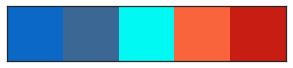

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)
df=data_frame

In [30]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Anandarshan\\Downloads\\covid_19_india.csv")
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

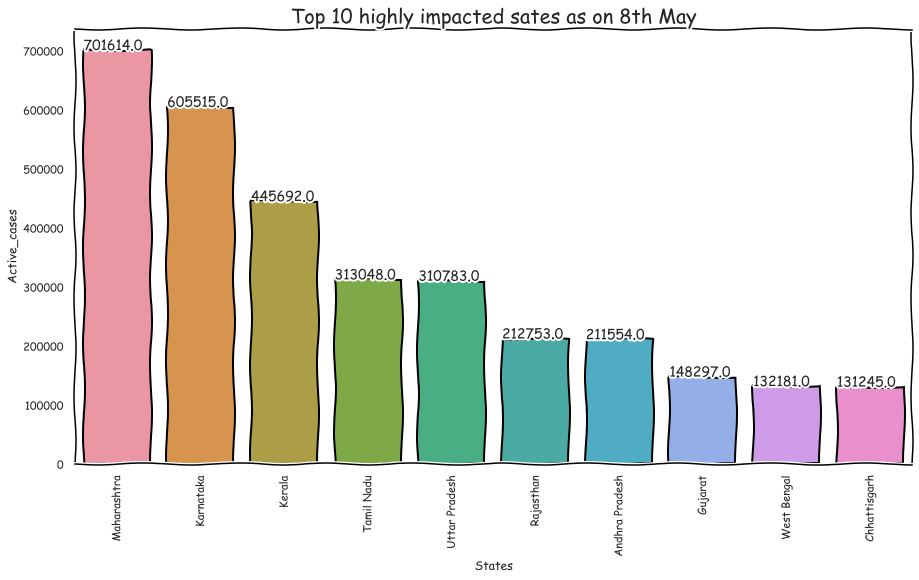

In [31]:
top_10=df.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 highly impacted sates as on 8th May", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

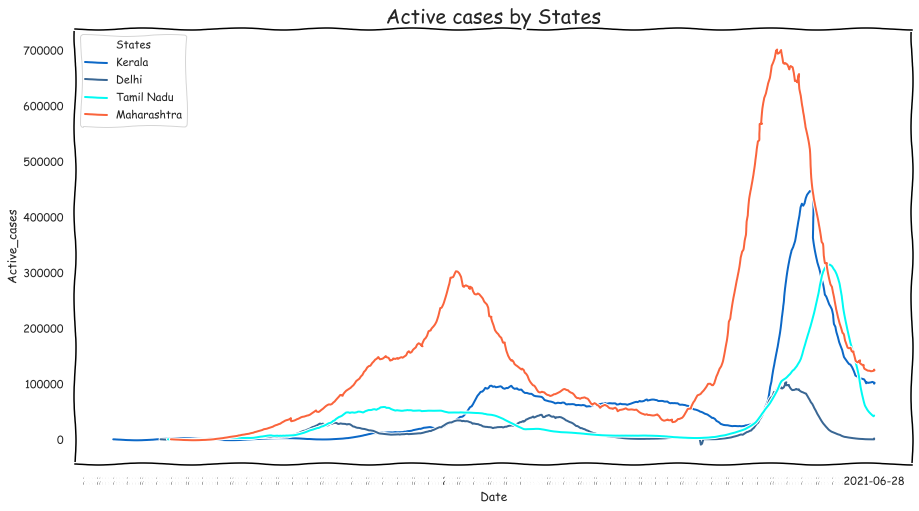

In [32]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)

IndexError: index 40 is out of bounds for axis 0 with size 40

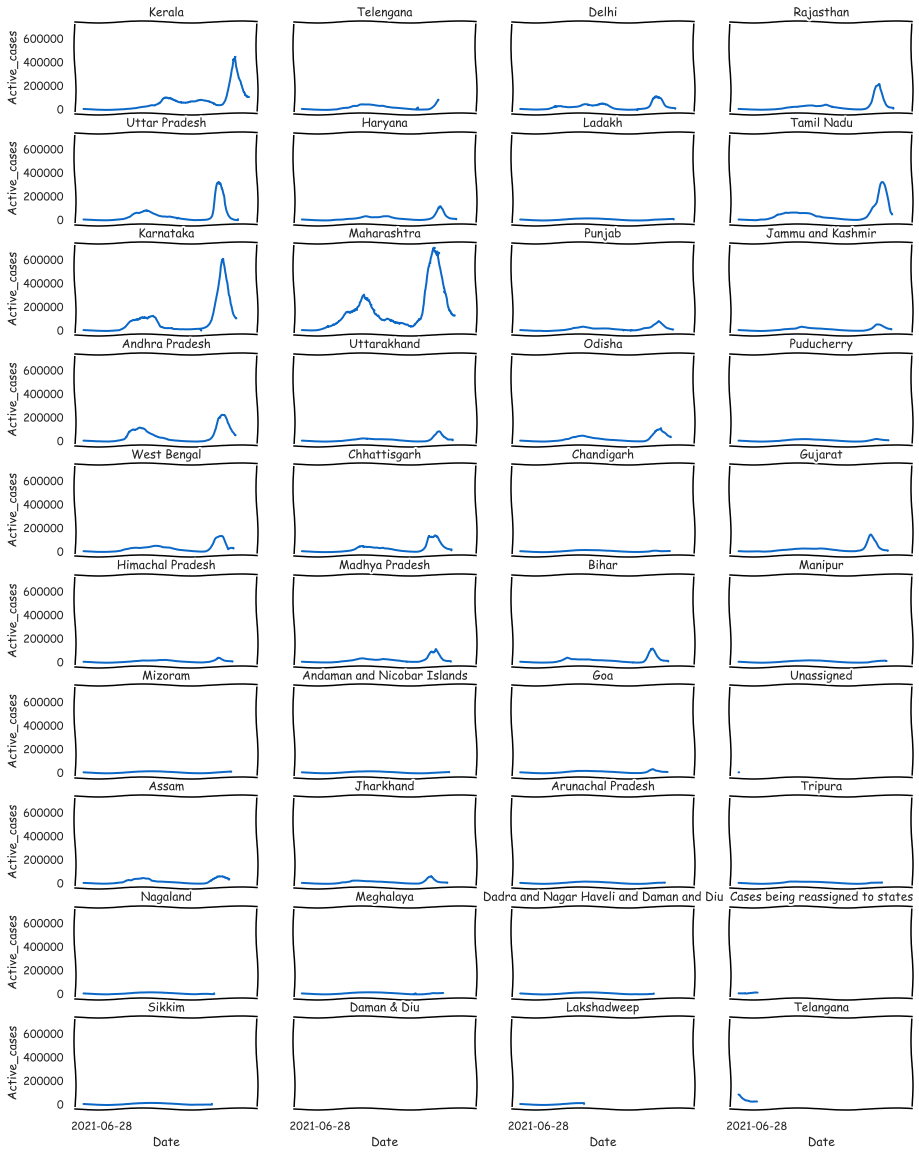

In [33]:
with plt.xkcd():
    fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[15,20], sharex=True, sharey=True)
    ax=ax.flatten()

    for i,s in enumerate(df['States'].unique()):
        data1=df[df['States']==s][['Date','Active_cases']]
        sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
        ax[i].set_title(s)

Outliners for states vs active_cases


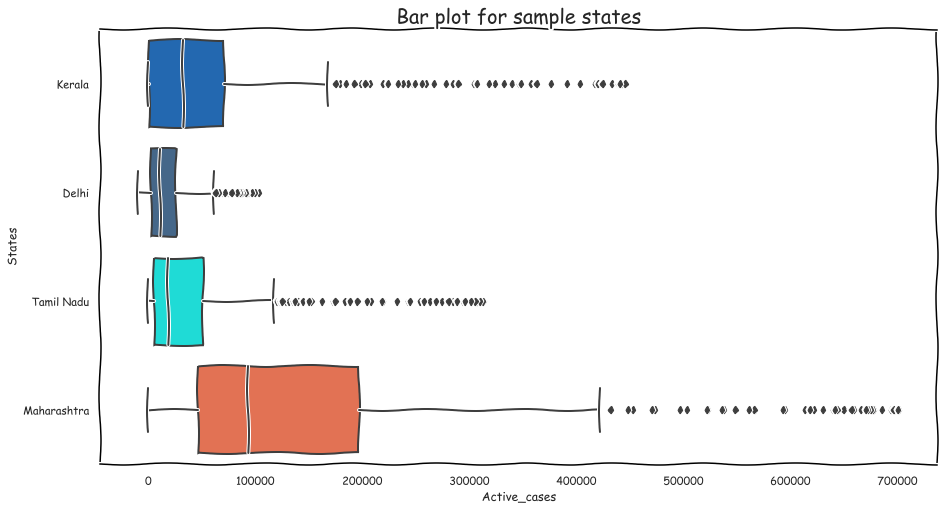

In [34]:
print("Outliners for states vs active_cases")
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Active_cases',y='States')
    plt.title("Bar plot for sample states" ,size=20)

In [37]:
median_states=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Delhi,7847.500000,336309.000000,6409.500000,372883.500000,10984.500000
Kerala,7295.500000,203495.500000,1035.500000,299514.000000,32623.000000
Maharashtra,7981.000000,1514079.000000,44024.000000,1683775.000000,93400.000000
Tamil Nadu,7956.000000,691236.000000,11122.000000,724522.000000,18395.000000


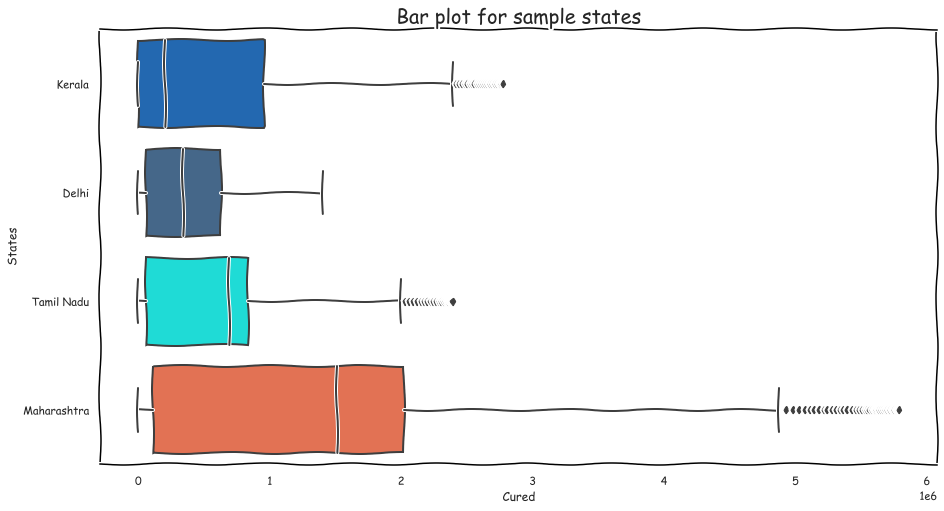

In [38]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Cured',y='States')
    plt.title("Bar plot for sample states" ,size=20)

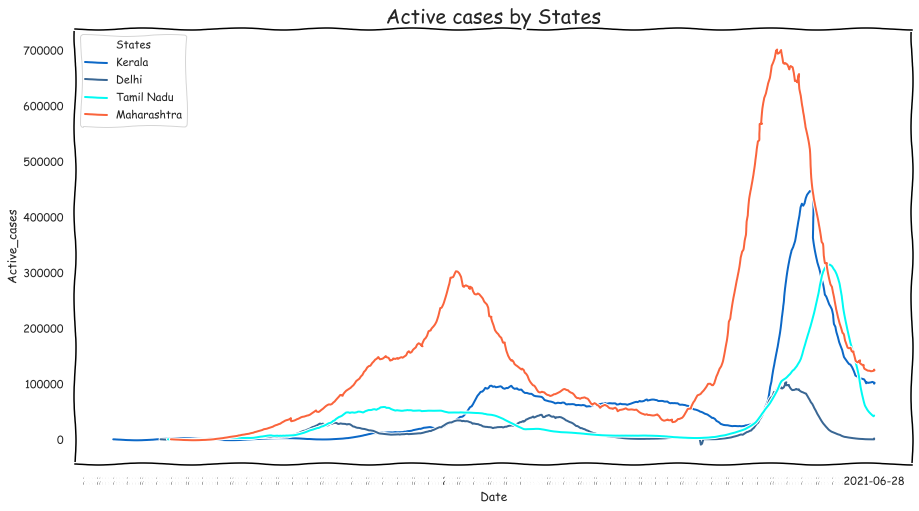

In [39]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)

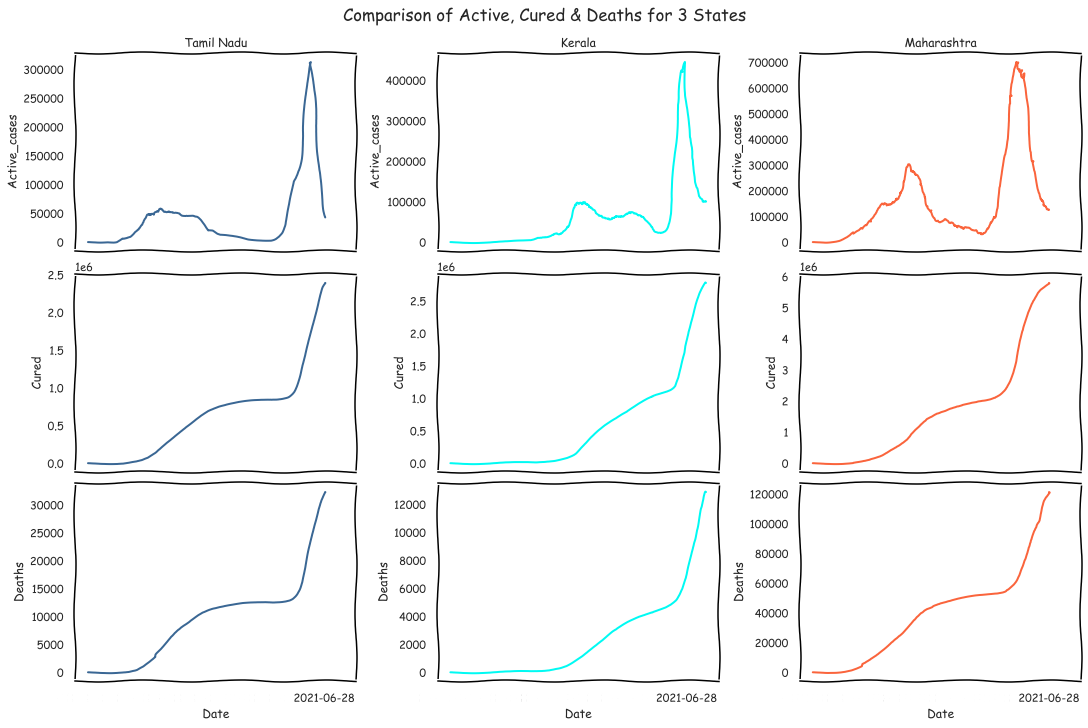

In [41]:

states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
    sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Maharashtra")
    sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

In [43]:
tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [45]:

st,p_value=ttest_ind(tn,kl)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

st,p_value=ttest_ind(tn,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

st,p_value=ttest_ind(kl,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Kerala have no significant difference in Cure rate
Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate
